<a href="https://colab.research.google.com/github/johnsuraj194/johnsuraj194/blob/main/Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Check for missing values


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visualising Age and Gender column for insights

In [ ]:
x=df.iloc[:,[1,2]].values
x

array([['Male', 19],
       ['Male', 21],
       ['Female', 20],
       ['Female', 23],
       ['Female', 31],
       ['Female', 22],
       ['Female', 35],
       ['Female', 23],
       ['Male', 64],
       ['Female', 30],
       ['Male', 67],
       ['Female', 35],
       ['Female', 58],
       ['Female', 24],
       ['Male', 37],
       ['Male', 22],
       ['Female', 35],
       ['Male', 20],
       ['Male', 52],
       ['Female', 35],
       ['Male', 35],
       ['Male', 25],
       ['Female', 46],
       ['Male', 31],
       ['Female', 54],
       ['Male', 29],
       ['Female', 45],
       ['Male', 35],
       ['Female', 40],
       ['Female', 23],
       ['Male', 60],
       ['Female', 21],
       ['Male', 53],
       ['Male', 18],
       ['Female', 49],
       ['Female', 21],
       ['Female', 42],
       ['Female', 30],
       ['Female', 36],
       ['Female', 20],
       ['Female', 65],
       ['Male', 24],
       ['Male', 48],
       ['Female', 31],
       ['Female', 49],
 

C:\Users\johns\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


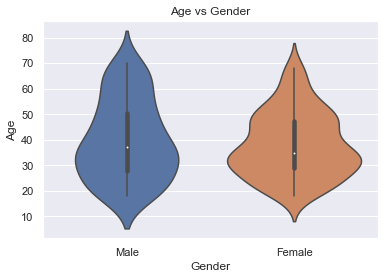

In [ ]:
sns.set()
sns.violinplot(df.Gender,df.Age)
plt.title('Age vs Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [ ]:
df.groupby('Gender').count()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,112,112,112,112
Male,88,88,88,88


# Choosing Annual Income and Spending Scores

In [ ]:
y=df.iloc[:,[3,4]].values
y

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

C:\Users\johns\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

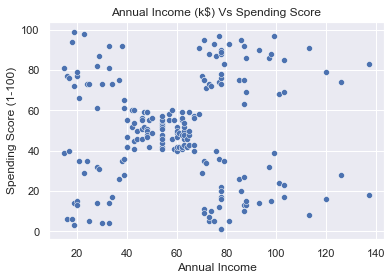

In [ ]:
sns.set()
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) Vs Spending Score')
plt.show

# Choosing the number of Clusters

In [ ]:
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(y)
    WCSS.append(kmeans.inertia_)

C:\Users\johns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
WCSS

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25044.96776401891,
 21884.744095710266,
 19692.55741822776]

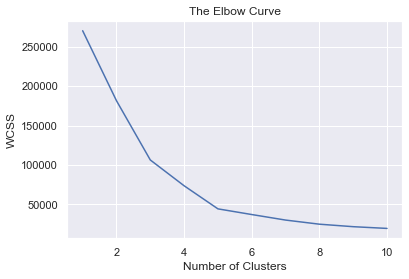

In [ ]:
sns.set()
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Training the k means clustering model 

In [ ]:
Kmeans=KMeans(n_clusters=5, init='k-means++',random_state=0)

# Return cluster number for each data points

In [ ]:
z=Kmeans.fit_predict(y)
print(z)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [ ]:
df['clusters']=z

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


# Now visualising clusters

<ipython-input-208-8afc1f7bf9d8>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],s=50,color='green',Label='Cluster1')
<ipython-input-208-8afc1f7bf9d8>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],s=50,color='red',Label='Cluster2')
<ipython-input-208-8afc1f7bf9d8>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],s=50,color='yellow',Label='Cluster3')
<ipython-input-208-8afc1f7bf9d8>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases late

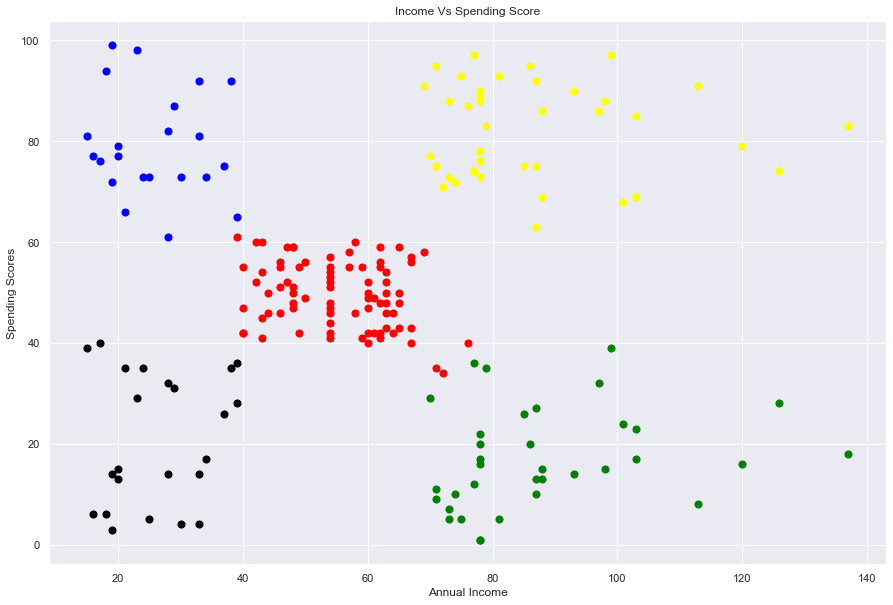

In [ ]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
df4=df[df.clusters==3]
df5=df[df.clusters==4]

plt.figure(figsize=(15,10))
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],s=50,color='green',Label='Cluster1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],s=50,color='red',Label='Cluster2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],s=50,color='yellow',Label='Cluster3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],s=50,color='blue',Label='Cluster4')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],s=50,color='black',Label='Cluster5')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scores')
plt.title('Income Vs Spending Score')
plt.show()




# Plotting the centroid of clusters

In [ ]:
kmeans1=Kmeans.cluster_centers_
kmeans1

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

<ipython-input-213-12937ca89c56>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],s=50,color='green',Label='Cluster1')
<ipython-input-213-12937ca89c56>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],s=50,color='red',Label='Cluster2')
<ipython-input-213-12937ca89c56>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],s=50,color='yellow',Label='Cluster3')
<ipython-input-213-12937ca89c56>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases late

Text(0.5, 1.0, 'Income Vs Spending Score')

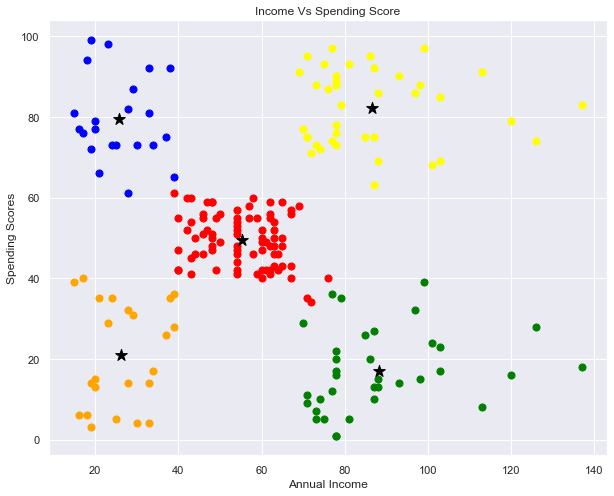

In [ ]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
df4=df[df.clusters==3]
df5=df[df.clusters==4]

plt.figure(figsize=(10,8))
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],s=50,color='green',Label='Cluster1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],s=50,color='red',Label='Cluster2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],s=50,color='yellow',Label='Cluster3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],s=50,color='blue',Label='Cluster4')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],s=50,color='orange',Label='Cluster5')

plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],c='black',s=150,marker='*',Label='centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scores')
plt.title('Income Vs Spending Score')

